In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
heart_data=pd.read_csv("/content/heart.csv")
diabetes_data=pd.read_csv("/content/diabetes.csv")
parkinsons_data=pd.read_csv("/content/parkinsons.csv")

#Checking the rows and columns of each of the datasets

In [7]:
print(f"heart data shape: Rows-{heart_data.shape[0]}, Columns {heart_data.shape[1]}")
print(f"Diabetes data shape: Rows-{diabetes_data.shape[0]}, Columns {diabetes_data.shape[1]}")
print(f"Parkinsons data shape: Rows-{parkinsons_data.shape[0]}, Columns {parkinsons_data.shape[1]}")



heart data shape: Rows-303, Columns 14
Diabetes data shape: Rows-768, Columns 9
Parkinsons data shape: Rows-195, Columns 24


#Checking whether any dataset has missing values for any columns

In [9]:
datasets=[heart_data,diabetes_data,parkinsons_data]
dataset_names=['heart_data','diabetes_data','parkinsons_data']
for i in range(len(datasets)):
  if datasets[i].isnull().values.any():
    print(f"{dataset_names[i]} has missing values")
    datasets[i].isnull().sum()
  else:
    print(f"{dataset_names[i]} has no missing values")

heart_data has no missing values
diabetes_data has no missing values
parkinsons_data has no missing values


Patient count with postive and negative results
Outcome
0    500
1    268
Name: count, dtype: int64


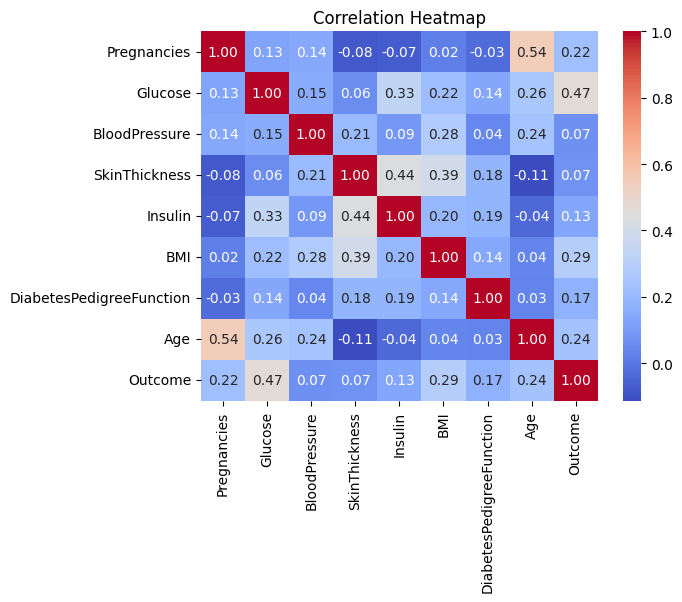

In [ ]:
print(f"Patient count with postive and negative results\n{diabetes_data['Outcome'].value_counts()}")
correlation_matrix=diabetes_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Patient count with postive and negative results
target
1    165
0    138
Name: count, dtype: int64


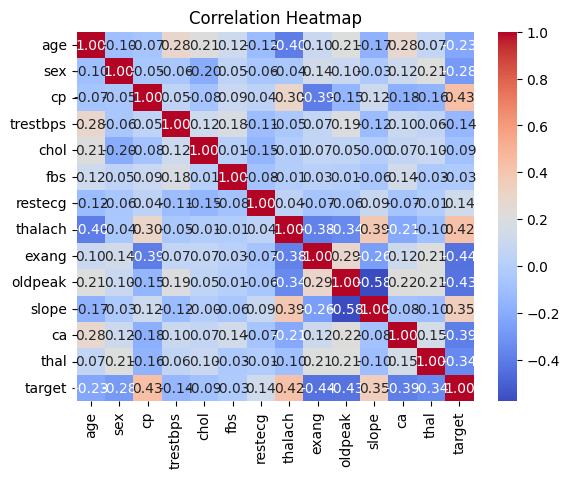

In [ ]:
print(f"Patient count with postive and negative results\n{heart_data['target'].value_counts()}")
correlation_matrix=heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

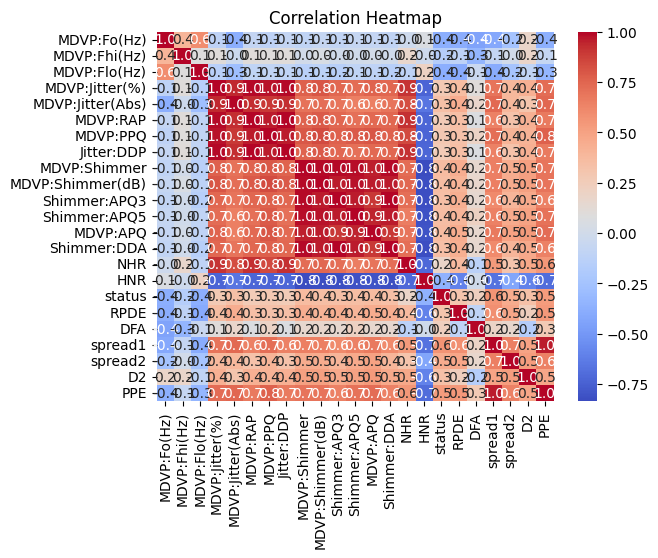

In [38]:
parkinsons_data['status'].value_counts()
parkinsons_data=parkinsons_data.drop(columns=['name'])
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
for m,i in enumerate(datasets):
  print(f"Description of : {dataset_names[m]}\n")
  print(f"{i.info()}")


Description of : heart_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
Description of : diabetes_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dt

In [102]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'datasets' and 'dataset_names' are defined from the previous code

for i, dataset in enumerate(datasets):
    # Separate features (X) and target (y)
    X = dataset.drop(columns=['target' if 'target' in dataset.columns else 'Outcome' if 'Outcome' in dataset.columns else 'status'])
    y = dataset['target' if 'target' in dataset.columns else 'Outcome' if 'Outcome' in dataset.columns else 'status']
    from sklearn.preprocessing import RobustScaler

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

    # Initialize and train the Decision Tree classifier
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {dataset_names[i]}: {accuracy}")

Accuracy for heart_data: 0.8032786885245902
Accuracy for diabetes_data: 0.7727272727272727
Accuracy for parkinsons_data: 0.8974358974358975


In [103]:
# prompt: use svm on all dataset

from sklearn.svm import SVC

# Assuming 'datasets' and 'dataset_names' are defined from the previous code

for i, dataset in enumerate(datasets):
    # Separate features (X) and target (y)
    X = dataset.drop(columns=['target' if 'target' in dataset.columns else 'Outcome' if 'Outcome' in dataset.columns else 'status'])
    y = dataset['target' if 'target' in dataset.columns else 'Outcome' if 'Outcome' in dataset.columns else 'status']
    from sklearn.preprocessing import RobustScaler

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

    # Initialize and train the SVM classifier
    model = SVC()  # You can adjust parameters like kernel, C, gamma, etc.
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {dataset_names[i]} using SVM: {accuracy}")

Accuracy for heart_data using SVM: 0.8688524590163934
Accuracy for diabetes_data using SVM: 0.7272727272727273
Accuracy for parkinsons_data using SVM: 0.8974358974358975


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the datasets (assuming they are in the correct location)
heart_data = pd.read_csv("/content/heart.csv")
diabetes_data = pd.read_csv("/content/diabetes.csv")
parkinsons_data = pd.read_csv("/content/parkinsons.csv")
parkinsons_data=parkinsons_data.drop(columns=['name'])
datasets = [heart_data, diabetes_data, parkinsons_data]
dataset_names = ['heart_data', 'diabetes_data', 'parkinsons_data']

for i, dataset in enumerate(datasets):
    X = dataset.drop(columns=['target' if 'target' in dataset.columns else 'Outcome' if 'Outcome' in dataset.columns else 'status'])
    y = dataset['target' if 'target' in dataset.columns else 'Outcome' if 'Outcome' in dataset.columns else 'status']
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),  # Added batch normalization
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)  # Adjust batch_size if needed

    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy for {dataset_names[i]} using Neural Network: {accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6890 - loss: 0.6141
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8647 - loss: 0.3331 
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8952 - loss: 0.2769 
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8801 - loss: 0.2836 
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9144 - loss: 0.2348 
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9317 - loss: 0.1887  
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9075 - loss: 0.2007 
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9536 - loss: 0.1629 
Epoch 9/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9069 - loss: 0.2625 
Epoch 10/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9327 - loss: 0.1620 
Epoch 11/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9177 - loss: 0.1909 
Epoch 12/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9451 - loss: 0.1986 
E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7017 - loss: 0.6127
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.5071 
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7785 - loss: 0.5214 
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7642 - loss: 0.4647 
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7905 - loss: 0.4609
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7845 - loss: 0.4721 
Epoch 7/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8069 - loss: 0.4271 
Epoch 8/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7760 - loss: 0.4494 
Epoch 9/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7866 - loss: 0.4591
Epoch 10/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8081 - loss: 0.4099
Epoch 11/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8090 - loss: 0.4329
Epoch 12/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8052 - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6236 - loss: 0.7533
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8553 - loss: 0.3033  
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8432 - loss: 0.2923 
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9297 - loss: 0.1943  
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9516 - loss: 0.1556  
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9630 - loss: 0.1415  
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9594 - loss: 0.1070 
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9483 - loss: 0.1322 
Epoch 9/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9663 - loss: 0.0980 
Epoch 10/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9430 - loss: 0.1226 
Epoch 11/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9317 - loss: 0.1564 
Epoch 12/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9637 - loss: 0.1469 
Epoch 13/